<a href="https://colab.research.google.com/github/QuangHuy54/AppliedDataAnalysis_FinalProject/blob/main/20120497.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Đồ án thực hành
MSSV: 20120497\
Họ tên: Nguyễn Quang Huy


# 1. Chuẩn bị dữ liệu

## 1.1. Tập hợp dữ liệu

In [224]:
#Import các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

Đầu tiên thì ta cần đọc hai file Data_Train vào hai dataframe và gộp vào thành một dataframe:

In [225]:
#Đọc file Data_Train_p1 vào dataframe
df_p1 = pd.read_excel("Data_Train_p1.xlsx", header=0, index_col=None)
df_p1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
8810,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
8811,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
8812,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
8813,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [226]:
#Đọc file Data_Train_p2 vào dataframe
df_p2 = pd.read_excel("Data_Train_p2.xlsx", header=0, index_col=None)
df_p2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,15/05/2019,Delhi,Cochin,DEL → HYD → COK,06:50,16:10,9h 20m,1 stop,No info,6442
1,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,16:20,7h 55m,1 stop,In-flight meal not included,10844
2,Jet Airways,18/05/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,No info,5678
3,IndiGo,12/04/2019,Banglore,Delhi,BLR → DEL,23:30,02:20 13 Apr,2h 50m,non-stop,No info,6906
4,SpiceJet,21/05/2019,Chennai,Kolkata,MAA → CCU,09:45,12:00,2h 15m,non-stop,No check-in baggage included,3543


In [227]:
#2. Merge hai data frame
df=pd.concat([df_p1,df_p2])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 1.2. Mô tả dữ liệu



*   Kiểm tra số dòng, số cột và kiểu dữ liệu



In [228]:
#Xem thông tin của data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10684 entries, 0 to 1868
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10684 non-null  object
 1   Date_of_Journey  10684 non-null  object
 2   Source           10684 non-null  object
 3   Destination      10684 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10684 non-null  object
 6   Arrival_Time     10684 non-null  object
 7   Duration         10684 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10684 non-null  object
 10  Price            10684 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.6+ KB


Dữ liệu có 10684 dòng, 11 cột\
Các thuộc tính Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops và Additional_Info có kiểu dữ liệu trong dataframe là object (chuỗi) hoặc  còn Price là int64 (số nguyên).

In [229]:
#Mô tả thông tin cột Price
df['Price'].describe()

count    10684.000000
mean      9087.545582
std       4611.411873
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

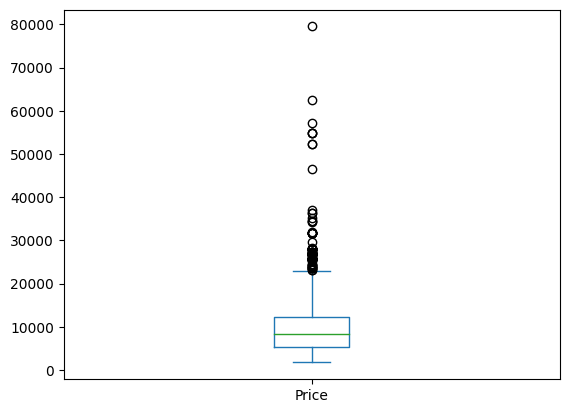

In [230]:
df.plot(y=["Price"],kind='box');

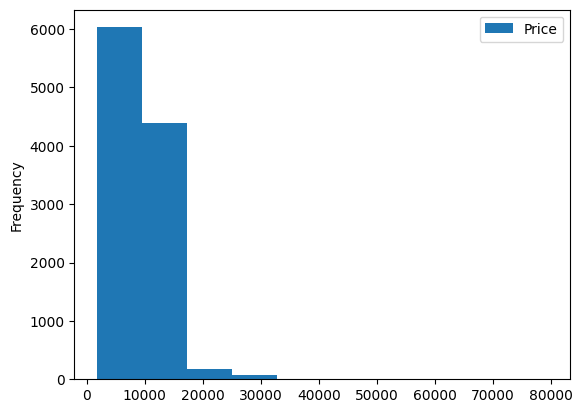

In [231]:
df.plot(y=["Price"],kind='hist');



*   Kiểm tra các giá trị khác nhau trong các cột phân loại



## 1.3. Làm sạch dữ liệu

### 1.3.1. Xử lý dữ liệu thiếu

In [232]:
df.isna().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

In [233]:
for column in df.columns:
  percentage=df[column].isnull().mean()
  print(f"{column}: {round(percentage*100,2)}%")

Airline: 0.0%
Date_of_Journey: 0.0%
Source: 0.0%
Destination: 0.0%
Route: 0.01%
Dep_Time: 0.0%
Arrival_Time: 0.0%
Duration: 0.0%
Total_Stops: 0.01%
Additional_Info: 0.0%
Price: 0.0%


In [238]:
df.dropna(inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64



### 1.3.2. Xử lý outlier



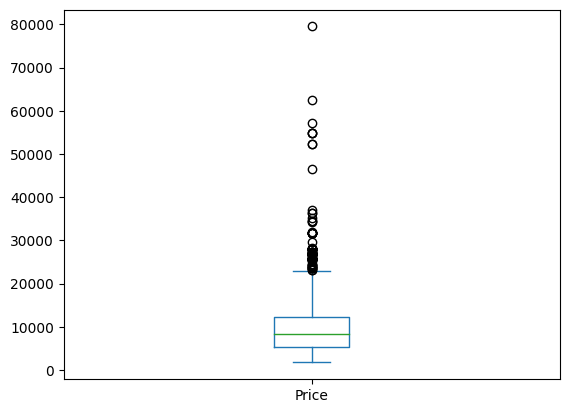

In [235]:
df.plot(y=["Price"],kind='box');

### 1.3.3. Xử lý dữ liệu trùng

In [18]:
print("Số dòng bị trùng:",df.duplicated().sum())

Số dòng bị trùng: 221


In [237]:
df.drop_duplicates(inplace=True)
print("Số dòng bị trùng:",df.duplicated().sum())

Số dòng bị trùng: 0


## 1.4. Chuyển đổi dữ liệu


In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### 1.4.1. Data Standardization



*   Đổi Duration thành số phút



In [22]:
df["Duration"]=df["Duration"].str.replace('h','*60').str.replace(' ','+').str.replace('m','')
df["Duration"]=df["Duration"].apply(eval)
df["Duration"]=pd.to_numeric(df['Duration'])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302




*   Tách Date_of_Journey thành các cột ngày tháng năm



In [23]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y")
df['Date_of_Journey_day']= df['Date_of_Journey'].dt.day
df['Date_of_Journey_month_name']= df['Date_of_Journey'].dt.month_name()
df['Date_of_Journey_month']= df['Date_of_Journey'].dt.month
df['Date_of_Journey_year']= df['Date_of_Journey'].dt.year
df['Date_of_Journey_weekday']= df['Date_of_Journey'].dt.day_name()
df.drop('Date_of_Journey', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month_name,Date_of_Journey_month,Date_of_Journey_year,Date_of_Journey_weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,March,3,2019,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,May,5,2019,Wednesday
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,June,6,2019,Sunday
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,May,5,2019,Sunday
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,March,3,2019,Friday



*   Tách Dep_Time thành các cột giờ và phút


In [24]:
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"],format="%H:%M")
df["Dep_Time_hour"]=df["Dep_Time"].dt.hour
df["Dep_Time_minute"]=df["Dep_Time"].dt.minute
df.drop('Dep_Time', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month_name,Date_of_Journey_month,Date_of_Journey_year,Date_of_Journey_weekday,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,March,3,2019,Sunday,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,May,5,2019,Wednesday,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2 stops,No info,13882,9,June,6,2019,Sunday,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1 stop,No info,6218,12,May,5,2019,Sunday,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1 stop,No info,13302,1,March,3,2019,Friday,16,50


*   Tách Arrival_Time thành các cột giờ, phút, ngày, tháng


In [25]:
def add_day_month(row): #Thêm ngày và tháng nếu như không có trong dòng
  if len(row["Arrival_Time"])==5:
    month_name=datetime.datetime.strptime(str(row["Date_of_Journey_month"]), "%m").strftime("%b")
    return row["Arrival_Time"]+' '+str(row["Date_of_Journey_day"])+' '+month_name
  return row["Arrival_Time"]

df['Arrival_Time'] = df.apply(add_day_month, axis=1)
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"],format="%H:%M %d %b")
df["Arrival_Time_hour"]=df["Arrival_Time"].dt.hour
df["Arrival_Time_minute"]=df["Arrival_Time"].dt.minute
df["Arrival_Time_day"]=df["Arrival_Time"].dt.day
df["Arrival_Time_month"]=df["Arrival_Time"].dt.month
df.drop('Arrival_Time', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month_name,Date_of_Journey_month,Date_of_Journey_year,Date_of_Journey_weekday,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day,Arrival_Time_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,March,3,2019,Sunday,22,20,1,10,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,May,5,2019,Wednesday,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,June,6,2019,Sunday,9,25,4,25,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,May,5,2019,Sunday,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,March,3,2019,Friday,16,50,21,35,1,3


*   Sửa cột Total_Stops thành số


In [26]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [27]:
df['Total_Stops']=df['Total_Stops'].apply(lambda x: int(x.replace('non','0')[0]))
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month_name,Date_of_Journey_month,Date_of_Journey_year,Date_of_Journey_weekday,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day,Arrival_Time_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,March,3,2019,Sunday,22,20,1,10,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,May,5,2019,Wednesday,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,June,6,2019,Sunday,9,25,4,25,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,May,5,2019,Sunday,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,March,3,2019,Friday,16,50,21,35,1,3




*   Sửa trùng giá trị trong "Additional_Info"



In [28]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover',
       'Change airports', 'Business class', 'Red-eye flight', 'No Info',
       '2 Long layover', '1 Short layover'], dtype=object)

In [29]:
df['Additional_Info']=df['Additional_Info'].str.replace("No Info","No info")

In [30]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover',
       'Change airports', 'Business class', 'Red-eye flight',
       '2 Long layover', '1 Short layover'], dtype=object)

# 2. Phân tích khám phá Dữ liệu

## 2.1. Giá vé theo thời điểm

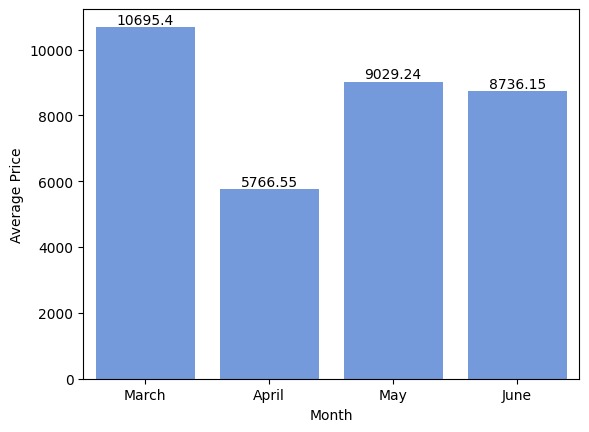

In [31]:
month_order = ['March','April','May','June']
ax=sns.barplot(data=df, x="Date_of_Journey_month_name", y="Price",order=month_order,color="cornflowerblue",errorbar=None)
ax.bar_label(ax.containers[0])
ax.set(ylabel='Average Price')
ax.set(xlabel='Month')
plt.show()

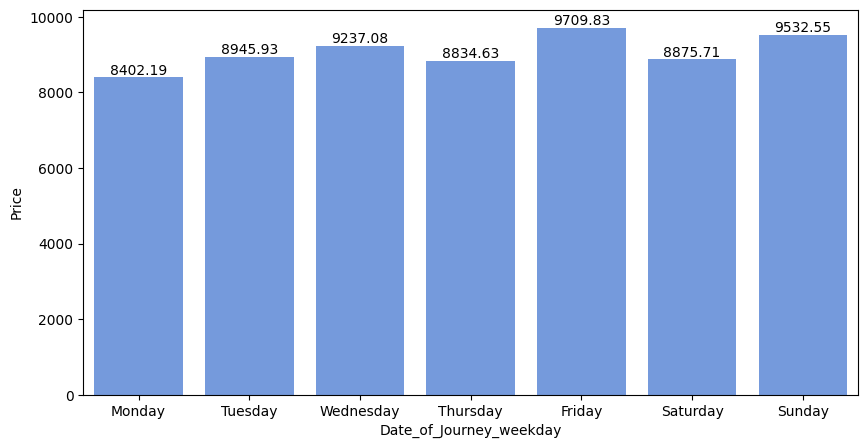

In [32]:
weekday_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.figure(figsize=(10,5))
ax=sns.barplot(data=df,x='Date_of_Journey_weekday',y='Price',order=weekday_order,color="cornflowerblue",errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

## 2.2. So sánh tỷ lệ các chuyến bay thẳng và trung chuyển

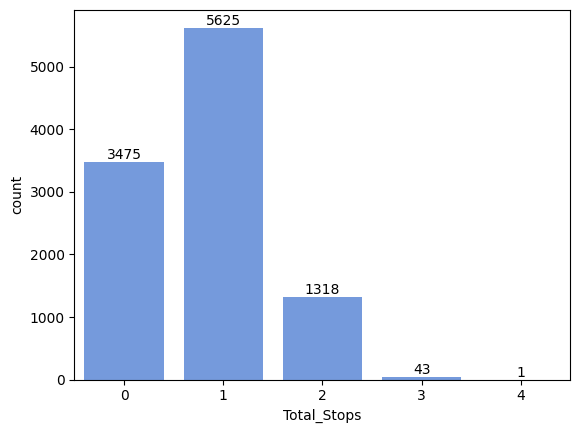

In [33]:
ax=sns.countplot(data=df,x='Total_Stops',color="cornflowerblue")
ax.bar_label(ax.containers[0])
plt.show()

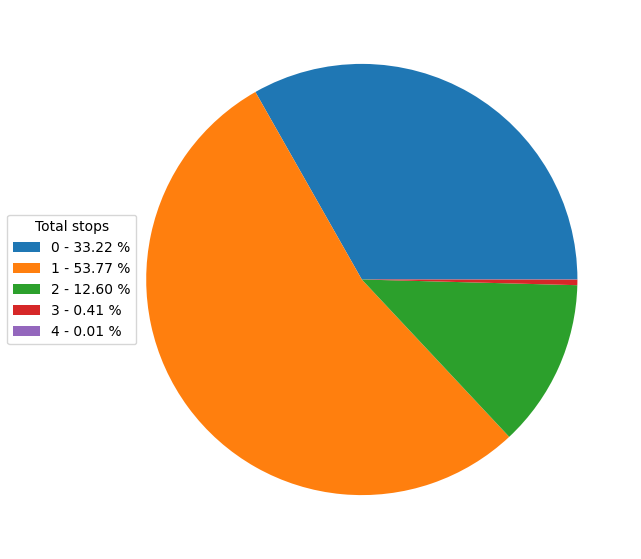

In [34]:
ax=plt.figure(figsize =(7, 7))
total_counts=df["Total_Stops"].value_counts().sort_index()
percentages=total_counts*100/total_counts.sum()

labels = ['{0} - {1:1.2f} %'.format(total_stop,percentage) for total_stop,percentage in percentages.items()]
plt.pie(percentages);
ax.legend(labels=labels,loc='center left',title="Total stops")
plt.show()

## 2.3. Số lượng chuyến bay theo thành phố

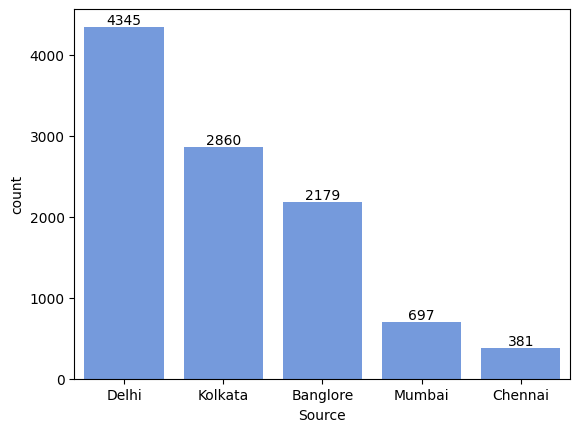

In [35]:
ax=sns.countplot(data=df,x='Source',color="cornflowerblue",order = df['Source'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

## 2.4. Số lượng chuyến bay theo hãng bay

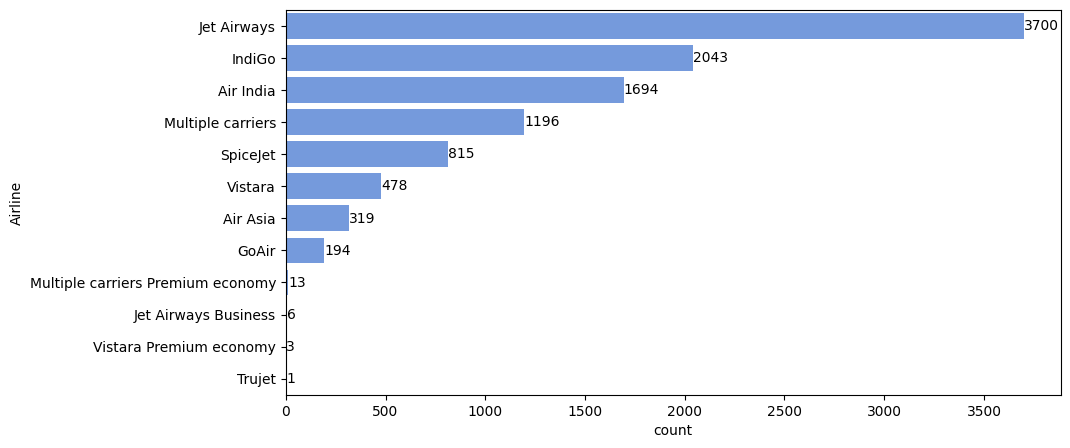

In [36]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,y='Airline',color="cornflowerblue",order = df['Airline'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

## 2.5. Số lượng chuyến bay theo tháng

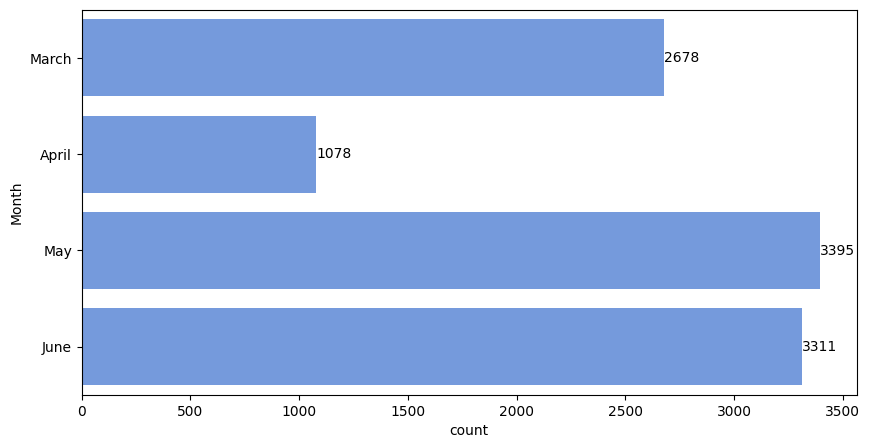

In [37]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,y='Date_of_Journey_month_name',color="cornflowerblue",order=month_order)
ax.bar_label(ax.containers[0])
ax.set(ylabel='Month')
plt.show()

## 2.6. Sự thay đổi của giá vé theo hãng hàng không

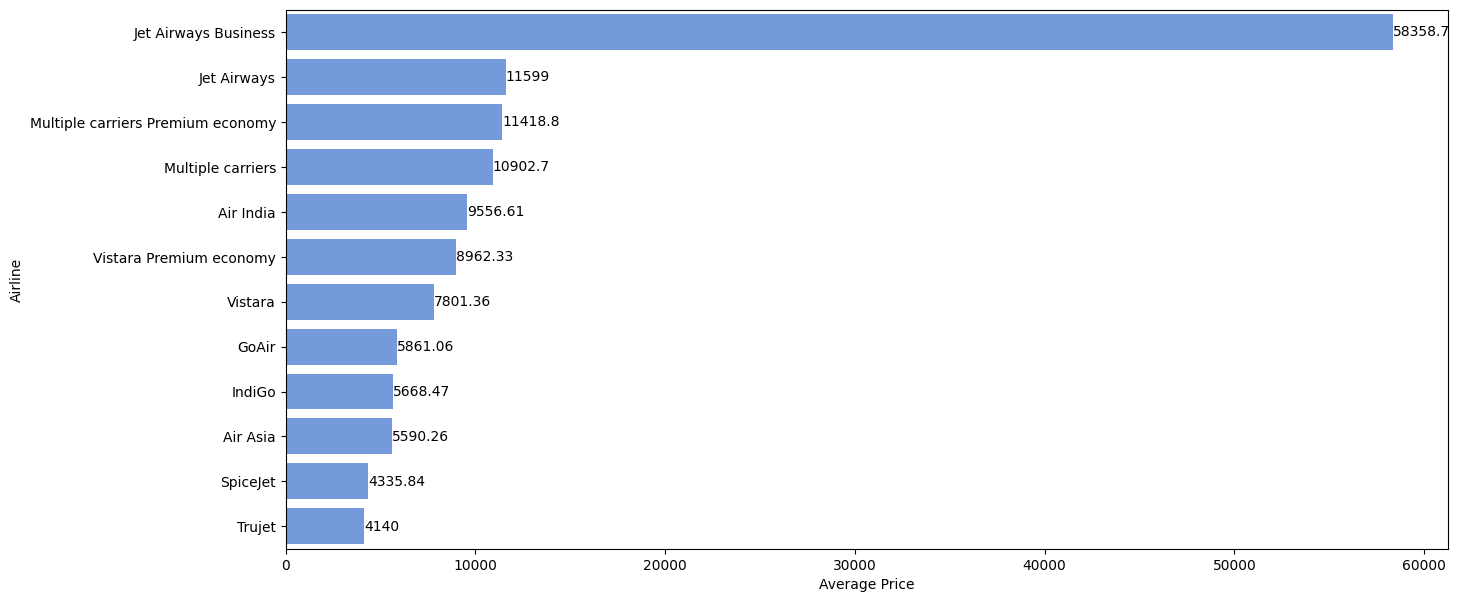

In [38]:
plt.figure(figsize=(15,7))
order=df.groupby('Airline')['Price'].mean().sort_values(ascending=False).index
ax=sns.barplot(data=df,y='Airline',x="Price",color="cornflowerblue", errorbar=None,order=order)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Average Price')
plt.show()

## 2.7. Sự thay đổi của giá vé theo ngày mua

In [39]:
df_year_min=df[df["Date_of_Journey_year"]==df["Date_of_Journey_year"].min()]
df_month_min=df_year_min[df_year_min["Date_of_Journey_month"]==df_year_min["Date_of_Journey_month"].min()]
df_day_min=df_month_min[df_month_min["Date_of_Journey_day"]==df_month_min["Date_of_Journey_day"].min()]
print(df_day_min.iloc[0])

Airline                                IndiGo
Source                               Banglore
Destination                         New Delhi
Route                         BLR → NAG → DEL
Duration                                  285
Total_Stops                                 1
Additional_Info                       No info
Price                                   13302
Date_of_Journey_day                         1
Date_of_Journey_month_name              March
Date_of_Journey_month                       3
Date_of_Journey_year                     2019
Date_of_Journey_weekday                Friday
Dep_Time_hour                              16
Dep_Time_minute                            50
Arrival_Time_hour                          21
Arrival_Time_minute                        35
Arrival_Time_day                            1
Arrival_Time_month                          3
Name: 4, dtype: object


In [40]:
print("Số lượng chuyến 2/1/2019: ",len(df_month_min[df_month_min["Date_of_Journey_day"]==2]["Price"]))
print("Số lượng chuyến 3/1/2019: ",len(df_month_min[df_month_min["Date_of_Journey_day"]==3]["Price"]))

Số lượng chuyến 2/1/2019:  0
Số lượng chuyến 3/1/2019:  309


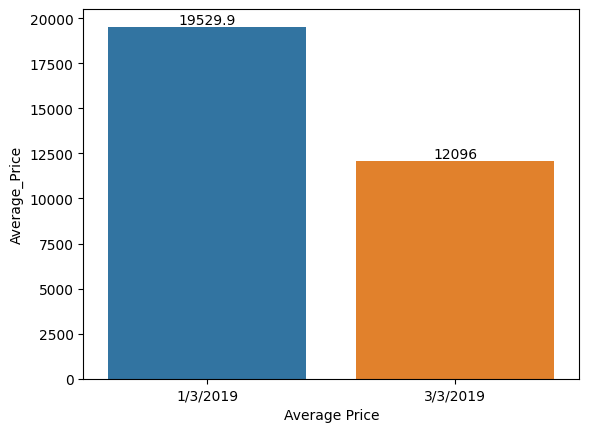

In [41]:
label_dates=[]
average_prices=[]
for i in {1,3}:
  label_dates.append("{0}/3/2019".format(i))
  average_prices.append(df_month_min[df_month_min["Date_of_Journey_day"]==i]["Price"].mean())
data = {'Date': label_dates,
        'Average_Price': average_prices}

ax=sns.barplot(data=pd.DataFrame(data),x='Date',y='Average_Price');
ax.bar_label(ax.containers[0]);
ax.set(xlabel='Average Price');

In [42]:
df_day_3=df_month_min[df_month_min["Date_of_Journey_day"]==3]
df_rows_1=df_day_min[(df_day_min["Route"]=="BLR → DEL")&(df_day_min["Airline"]=="IndiGo")&(df_day_min["Destination"]=="New Delhi")&(df_day_min["Additional_Info"]=="No info")]
df_rows_3=df_day_3[(df_day_3["Route"]=="BLR → DEL")&(df_day_3["Airline"]=="IndiGo")&(df_day_3["Destination"]=="New Delhi")&(df_day_3["Additional_Info"]=="No info")]

print("Số lượng chuyến ngày 1/3/2019 với điều kiện trên:",len(df_rows_1))
print("Số lượng chuyến ngày 3/3/2019 với điều kiện trên:",len(df_rows_3))

Số lượng chuyến ngày 1/3/2019 với điều kiện trên: 11
Số lượng chuyến ngày 3/3/2019 với điều kiện trên: 21


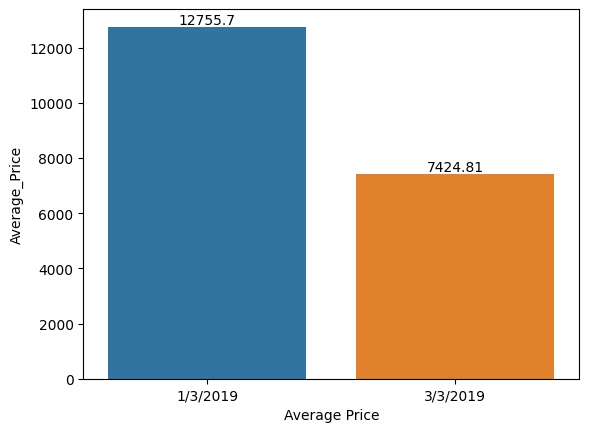

In [43]:
data = {'Date': label_dates,
        'Average_Price': [df_rows_1["Price"].mean(),df_rows_3["Price"].mean()]}

ax=sns.barplot(data=pd.DataFrame(data),x='Date',y='Average_Price');
ax.bar_label(ax.containers[0]);
ax.set(xlabel='Average Price');

## 2.8. Sự thay đổi của giá vé theo thời gian đi và đến

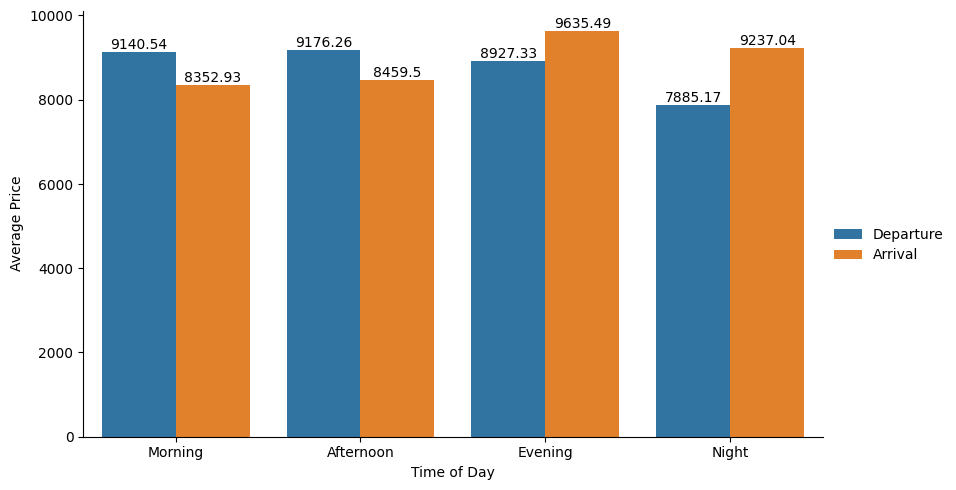

In [44]:
#Lấy thời gian trung bình chia theo các mốc trong ngày
#Departure
morning_departure_average_price=df[(df['Dep_Time_hour']>=5)&(df['Dep_Time_hour']<=11)]['Price'].mean()
afternoon_departure_average_price=df[(df['Dep_Time_hour']>=12)&(df['Dep_Time_hour']<=17)]['Price'].mean()
evening_departure_average_price=df[(df['Dep_Time_hour']>=18)&(df['Dep_Time_hour']<=22)]['Price'].mean()
night_departure_average_price=df[(df['Dep_Time_hour']>=23)|(df['Dep_Time_hour']<=4)]['Price'].mean()
#Arrival
morning_arrival_average_price=df[(df['Arrival_Time_hour']>=5)&(df['Arrival_Time_hour']<=11)]['Price'].mean()
afternoon_arrival_average_price=df[(df['Arrival_Time_hour']>=12)&(df['Arrival_Time_hour']<=17)]['Price'].mean()
evening_arrival_average_price=df[(df['Arrival_Time_hour']>=18)&(df['Arrival_Time_hour']<=22)]['Price'].mean()
night_arrival_average_price=df[(df['Arrival_Time_hour']>=23)|(df['Arrival_Time_hour']<=4)]['Price'].mean()

#Tạo dữ liệu để vẽ biểu đồ
data = {'Time_of_day': ['Morning','Morning', 'Afternoon','Afternoon', 'Evening','Evening', 'Night','Night'],
        'Flight_status': ['Departure','Arrival','Departure','Arrival','Departure','Arrival','Departure','Arrival'],
        'Average_Price': [morning_departure_average_price, morning_arrival_average_price,afternoon_departure_average_price, afternoon_arrival_average_price,
                          evening_departure_average_price,evening_arrival_average_price, night_departure_average_price,night_arrival_average_price]}

g=sns.catplot(data=pd.DataFrame(data),x='Time_of_day',y='Average_Price',hue='Flight_status',kind='bar',aspect=1.7)
ax = g.facet_axis(0, 0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set(ylabel='Average Price')
ax.set(xlabel='Time of Day')
g.legend.set_title("")
plt.show()

## 2.9. Sự thay đổi của giá vé theo địa điểm nguồn và đích

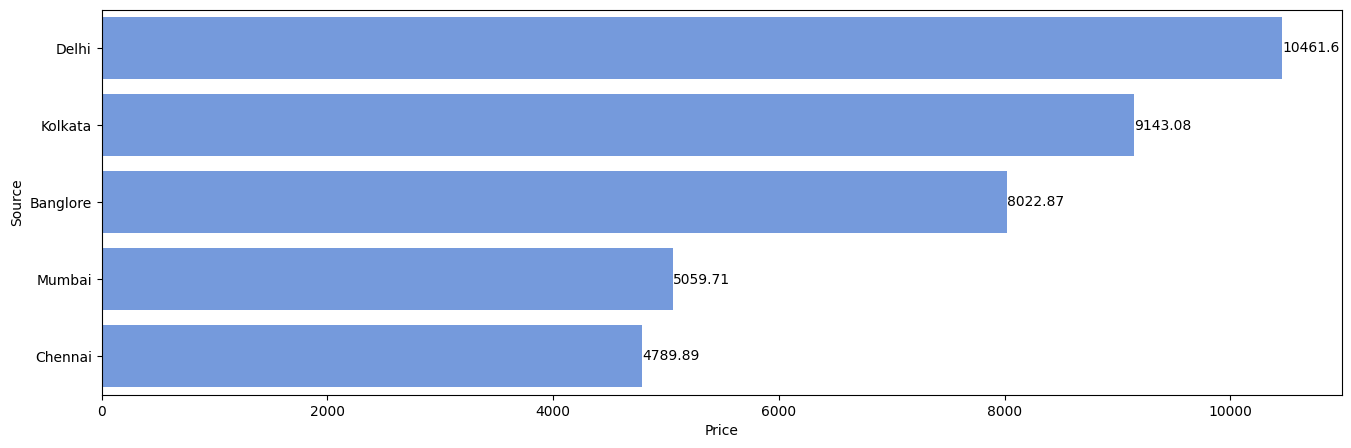

In [45]:
plt.figure(figsize=(16,5))
order=df.groupby('Source')['Price'].mean().sort_values(ascending=False).index
ax=sns.barplot(data=df,x='Price',y='Source',color="cornflowerblue",order = order, errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

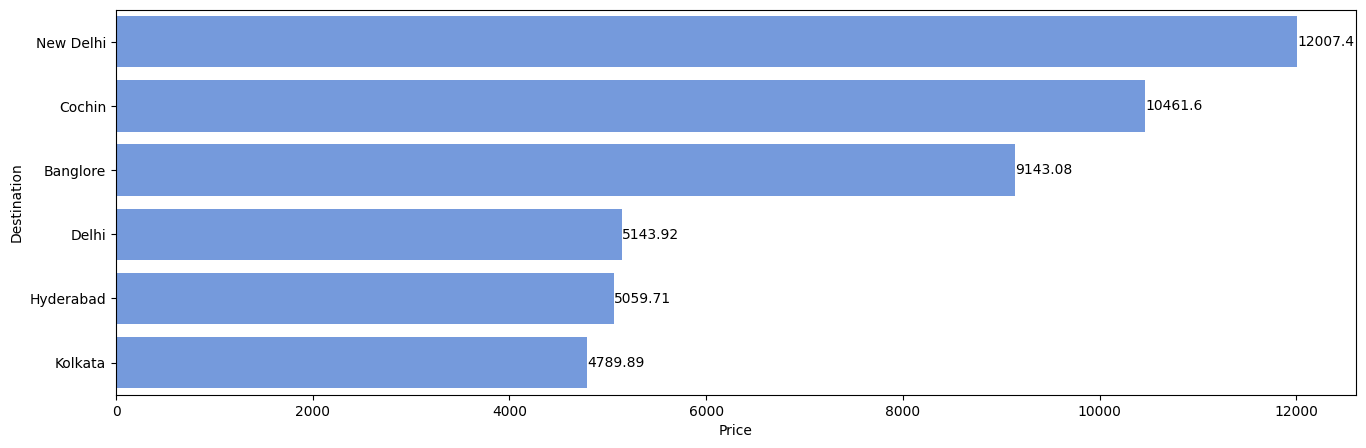

In [46]:
plt.figure(figsize=(16,5))
order=df.groupby('Destination')['Price'].mean().sort_values(ascending=False).index
ax=sns.barplot(data=df,x='Price',y='Destination',color="cornflowerblue",order = order, errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

# 3. Dự đoán giá vé

## 3.1. Chuyển đổi dữ liệu

### 3.1.1. Xử lý các biến phân loại

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 1867
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Airline                     10462 non-null  object
 1   Source                      10462 non-null  object
 2   Destination                 10462 non-null  object
 3   Route                       10462 non-null  object
 4   Duration                    10462 non-null  int64 
 5   Total_Stops                 10462 non-null  int64 
 6   Additional_Info             10462 non-null  object
 7   Price                       10462 non-null  int64 
 8   Date_of_Journey_day         10462 non-null  int64 
 9   Date_of_Journey_month_name  10462 non-null  object
 10  Date_of_Journey_month       10462 non-null  int64 
 11  Date_of_Journey_year        10462 non-null  int64 
 12  Date_of_Journey_weekday     10462 non-null  object
 13  Dep_Time_hour               10462 non-null  int



*   Route


In [48]:
df[["Source","Destination","Total_Stops","Route","Duration"]].head()

,Source,Destination,Total_Stops,Route,Duration
0,Banglore,New Delhi,0,BLR → DEL,170
1,Kolkata,Banglore,2,CCU → IXR → BBI → BLR,445
2,Delhi,Cochin,2,DEL → LKO → BOM → COK,1140
3,Kolkata,Banglore,1,CCU → NAG → BLR,325
4,Banglore,New Delhi,1,BLR → NAG → DEL,285


In [49]:
df.drop(['Route'], axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month_name,Date_of_Journey_month,Date_of_Journey_year,Date_of_Journey_weekday,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day,Arrival_Time_month
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,March,3,2019,Sunday,22,20,1,10,22,3
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,May,5,2019,Wednesday,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,June,6,2019,Sunday,9,25,4,25,10,6
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,May,5,2019,Sunday,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,March,3,2019,Friday,16,50,21,35,1,3




*   Month



In [50]:
df[["Date_of_Journey_month_name","Date_of_Journey_month"]].head()

,Date_of_Journey_month_name,Date_of_Journey_month
0,March,3
1,May,5
2,June,6
3,May,5
4,March,3


In [51]:
df.drop(['Date_of_Journey_month_name'], axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Date_of_Journey_weekday,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Arrival_Time_day,Arrival_Time_month
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,2019,Sunday,22,20,1,10,22,3
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,2019,Wednesday,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,2019,Sunday,9,25,4,25,10,6
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,2019,Sunday,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,2019,Friday,16,50,21,35,1,3




*   Còn lại



In [52]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet',
       'Jet Airways Business', 'Multiple carriers Premium economy',
       'Vistara Premium economy'], dtype=object)

In [53]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [54]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [55]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover',
       'Change airports', 'Business class', 'Red-eye flight',
       '2 Long layover', '1 Short layover'], dtype=object)

In [56]:
df["Date_of_Journey_weekday"].unique()

array(['Sunday', 'Wednesday', 'Friday', 'Monday', 'Tuesday', 'Saturday',
       'Thursday'], dtype=object)

In [57]:
df=pd.get_dummies(df, columns=["Airline","Source","Destination","Additional_Info","Date_of_Journey_weekday"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 1867
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Duration                                      10462 non-null  int64
 1   Total_Stops                                   10462 non-null  int64
 2   Price                                         10462 non-null  int64
 3   Date_of_Journey_day                           10462 non-null  int64
 4   Date_of_Journey_month                         10462 non-null  int64
 5   Date_of_Journey_year                          10462 non-null  int64
 6   Dep_Time_hour                                 10462 non-null  int64
 7   Dep_Time_minute                               10462 non-null  int64
 8   Arrival_Time_hour                             10462 non-null  int64
 9   Arrival_Time_minute                           10462 non-null  int64
 10  Arrival_Tim

In [58]:
df.drop(['Additional_Info_No info'], axis=1,inplace=True)
df.head()

,Duration,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,...,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Date_of_Journey_weekday_Friday,Date_of_Journey_weekday_Monday,Date_of_Journey_weekday_Saturday,Date_of_Journey_weekday_Sunday,Date_of_Journey_weekday_Thursday,Date_of_Journey_weekday_Tuesday,Date_of_Journey_weekday_Wednesday
0,170,0,3897,24,3,2019,22,20,1,10,...,0,0,0,0,0,0,1,0,0,0
1,445,2,7662,1,5,2019,5,50,13,15,...,0,0,0,0,0,0,0,0,0,1
2,1140,2,13882,9,6,2019,9,25,4,25,...,0,0,0,0,0,0,1,0,0,0
3,325,1,6218,12,5,2019,18,5,23,30,...,0,0,0,0,0,0,1,0,0,0
4,285,1,13302,1,3,2019,16,50,21,35,...,0,0,0,1,0,0,0,0,0,0


### 3.1.2. Chuẩn hóa dữ liệu

In [59]:
from sklearn.preprocessing import MinMaxScaler

X=df.drop('Price',axis=1).values
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
X=pd.DataFrame(X_scaled)
y=df["Price"].values
X.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.057793,0.00,0.884615,0.000000,0.0,0.956522,0.363636,0.043478,0.181818,0.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.154116,0.50,0.000000,0.666667,0.0,0.217391,0.909091,0.565217,0.272727,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.397548,0.50,0.307692,1.000000,0.0,0.391304,0.454545,0.173913,0.454545,0.321429,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.112084,0.25,0.423077,0.666667,0.0,0.782609,0.090909,1.000000,0.545455,0.392857,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.098074,0.25,0.000000,0.000000,0.0,0.695652,0.909091,0.913043,0.636364,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.2. Data validation

In [ ]:
df.isna().sum()

In [ ]:
print("Số dòng bị trùng:",df.duplicated().sum())

### 3.2. Chia tập dữ liệu để huấn luyện và test

In [60]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)
print("Kích thước của tập train:",x_train.shape)
print("Kích thước tập test:",x_test.shape)

Kích thước của tập train: (8369, 49)
Kích thước tập test: (2093, 49)


In [61]:
print(y_train.shape)

(8369,)


### 3.3. Thí nghiệm với Linear Regression

In [62]:
from sklearn.metrics import mean_squared_error

def get_results(model,x_train,x_test,y_train,y_test):
  r2_score_train=model.score(x_train,y_train)
  r2_score_test=model.score(x_test,y_test)
  y_pred_train=model.predict(x_train)
  y_pred_test=model.predict(x_test)
  mean_squared_error_train=mean_squared_error(y_pred_train,y_train)
  mean_squared_error_test=mean_squared_error(y_pred_test,y_test)
  return r2_score_train,r2_score_test,mean_squared_error_train,mean_squared_error_test

In [212]:
result=[]

In [214]:
from sklearn.linear_model import LinearRegression

linear_regression_model=LinearRegression()
linear_regression_model.fit(x_train,y_train)

r2_score_train,r2_score_test,mean_squared_error_train,mean_squared_error_test=get_results(linear_regression_model,x_train,x_test,y_train,y_test)
result.append(["Linear Regression",r2_score_train,r2_score_test,mean_squared_error_train,mean_squared_error_test])
print("Tập train:")
print("R2-score:",r2_score_train)
print("MSE:",mean_squared_error_train)
print("Tập test:")
print("R2-score:",r2_score_test)
print("MSE:",mean_squared_error_test)

Tập train:
R2-score: 0.7012143983913639
MSE: 6427318.618410192
Tập test:
R2-score: 0.7045333325000154
MSE: 6168802.575478169


In [215]:
def plot_top10_coefficient(model,dataframe,model_name):
  columns=list(dataframe.drop('Price',axis=1).columns)
  coefficients=[model.coef_]
  data_coefficient=pd.DataFrame(coefficients,columns=columns,index=["0"])
  data_coefficient.sort_values(by='0',axis=1, key=pd.Series.abs,inplace=True,ascending=False)

  top_10_features_names=list(data_coefficient.columns[:10])[::-1]
  top_10_features_coef=data_coefficient.iloc[0,:10].values[::-1]
  plt.barh(top_10_features_names,top_10_features_coef);
  plt.title("Feature importance in {0}".format(model_name))
  plt.ylabel("Features")
  plt.xlabel("Feature Importance (Coefficient)")
  plt.show()

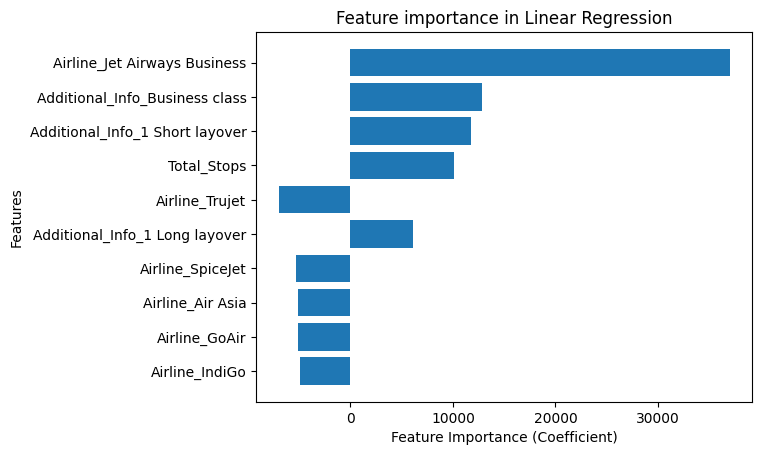

In [216]:
plot_top10_coefficient(linear_regression_model,df,"Linear Regression")

### 3.4. Thí nghiệm với Lasso Regression

In [217]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from numpy import arange

cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=0)
lasso_cv_model=LassoCV(alphas=arange(0.01,3,0.01),cv=cv,tol=0.01,max_iter=20000)
lasso_cv_model.fit(x_train,y_train)

r2_score_train,r2_score_test,mean_squared_error_train,mean_squared_error_test=get_results(lasso_cv_model,x_train,x_test,y_train,y_test)
result.append(["Lasso Regression",r2_score_train,r2_score_test,mean_squared_error_train,mean_squared_error_test])
print("Tập train:")
print("R2-score:",r2_score_train)
print("MSE:",mean_squared_error_train)
print("Tập test:")
print("R2-score:",r2_score_test)
print("MSE:",mean_squared_error_test)

Tập train:
R2-score: 0.7011095113572727
MSE: 6429574.893088134
Tập test:
R2-score: 0.704522135502323
MSE: 6169036.348271515


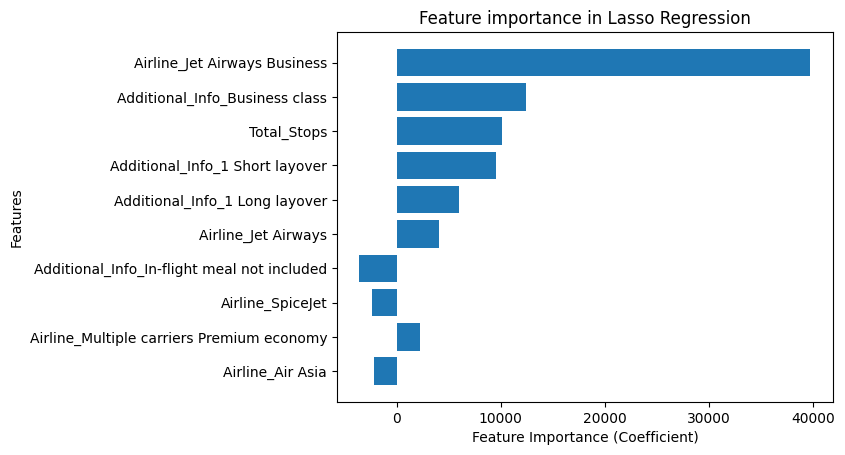

In [218]:
plot_top10_coefficient(lasso_cv_model,df,"Lasso Regression")

### 3.5. Thí nghiệm với Ridge Regression

In [219]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV

cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=0)
ridge_cv_model=RidgeCV(alphas=arange(0.01,3,0.01),cv=cv)
ridge_cv_model.fit(x_train,y_train)

r2_score_train,r2_score_test,mean_squared_error_train,mean_squared_error_test=get_results(ridge_cv_model,x_train,x_test,y_train,y_test)
result.append(["Ridge Regression",r2_score_train,r2_score_test,mean_squared_error_train,mean_squared_error_test])
print("Tập train:")
print("R2-score:",r2_score_train)
print("MSE:",mean_squared_error_train)
print("Tập test:")
print("R2-score:",r2_score_test)
print("MSE:",mean_squared_error_test)

Tập train:
R2-score: 0.7012076026772673
MSE: 6427464.804235421
Tập test:
R2-score: 0.7046855382411829
MSE: 6165624.7985192295


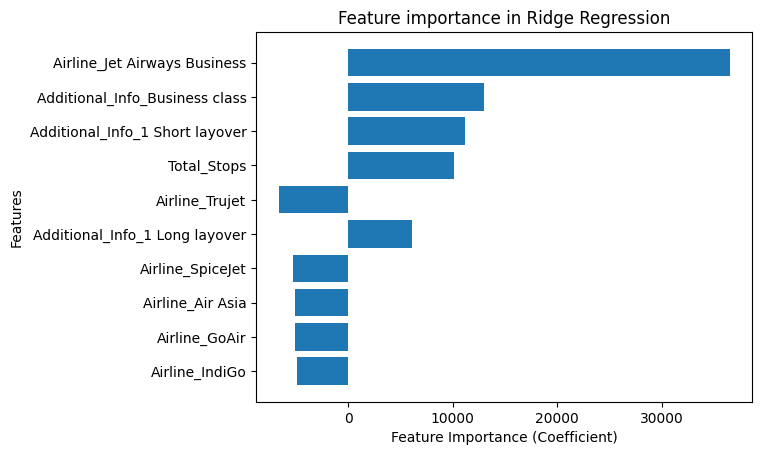

In [220]:
plot_top10_coefficient(ridge_cv_model,df,"Ridge Regression")

### 3.5. Thí nghiệm với Elastic-Net

In [221]:
from sklearn.linear_model import ElasticNetCV

cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=0)
elasticnet_cv_model=ElasticNetCV(alphas=arange(0.01,3,0.01),cv=cv,tol=0.01,max_iter=20000)
elasticnet_cv_model.fit(x_train,y_train)

r2_score_train,r2_score_test,mean_squared_error_train,mean_squared_error_test=get_results(elasticnet_cv_model,x_train,x_test,y_train,y_test)
result.append(["Elastic Net",r2_score_train,r2_score_test,mean_squared_error_train,mean_squared_error_test])
print("Tập train:")
print("R2-score:",r2_score_train)
print("MSE:",mean_squared_error_train)
print("Tập test:")
print("R2-score:",r2_score_test)
print("MSE:",mean_squared_error_test)

Tập train:
R2-score: 0.6470766016996636
MSE: 7591902.409472678
Tập test:
R2-score: 0.6772968511800025
MSE: 6737450.394656851


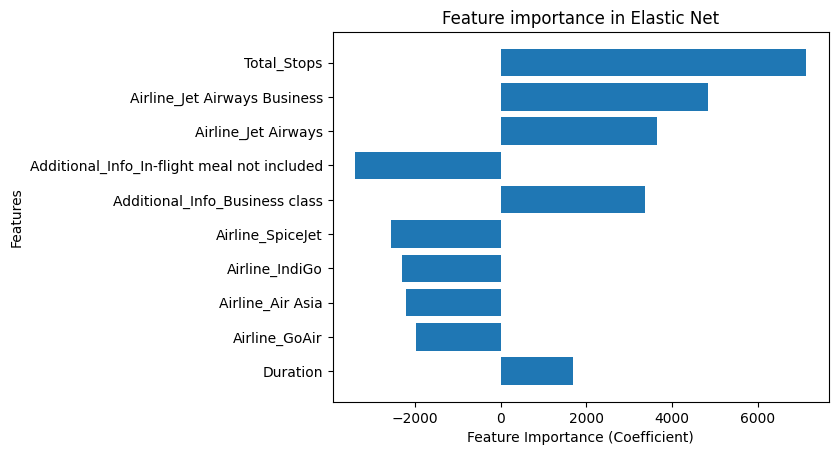

In [222]:
plot_top10_coefficient(elasticnet_cv_model,df,"Elastic Net")

### 3.6. Tổng hợp kết quả

In [223]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "R2-train", "R2-test", "MSE-train","MSE-test"]
for row in result:
  table.add_row(row)
print(table)

+-------------------+--------------------+--------------------+-------------------+--------------------+
|       Model       |      R2-train      |      R2-test       |     MSE-train     |      MSE-test      |
+-------------------+--------------------+--------------------+-------------------+--------------------+
| Linear Regression | 0.7012143983913639 | 0.7045333325000154 | 6427318.618410192 | 6168802.575478169  |
|  Lasso Regression | 0.7011095113572727 | 0.704522135502323  | 6429574.893088134 | 6169036.348271515  |
|  Ridge Regression | 0.7012076026772673 | 0.7046855382411829 | 6427464.804235421 | 6165624.7985192295 |
|    Elastic Net    | 0.6470766016996636 | 0.6772968511800025 | 7591902.409472678 | 6737450.394656851  |
+-------------------+--------------------+--------------------+-------------------+--------------------+
